In [1]:
from scipy.io import wavfile
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read audio
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
wavpath = os.path.join(os.getcwd(), 'sample1.wav')
samplerate, data = wavfile.read(wavpath)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


length = 0.09981859410430839s


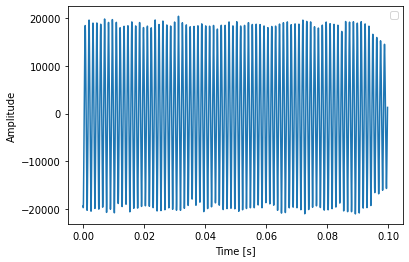

In [3]:
# visualise waveform
length = data.shape[0] / samplerate
print(f"length = {length}s")

import matplotlib.pyplot as plt
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:])
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


length = 0.0045351473922902496s


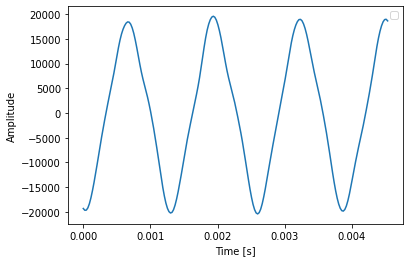

In [4]:
# zoomed in
snippet = data[0:200]
length = snippet.shape[0] / samplerate
print(f"length = {length}s")

time = np.linspace(0., length, snippet.shape[0])
plt.plot(time, snippet[:])
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [15]:
# do autocorrelation
SAMPLES = data.shape[0]
scdata = data/20000 #scale data to avoid overflows
for k in range(SAMPLES-400):
    sum = np.empty(SAMPLES-400)
    for m in range(400):
        sum[k] += scdata[m]*scdata[m+k]

In [13]:
# do autocorrelation on snippet (200 samples)
SAMPLES = snippet.shape[0]
scdata = snippet/20000 #scale data to avoid overflows
for k in range(SAMPLES-40):
    sum = np.empty(SAMPLES-40)
    for m in range(40):
        sum[k] += scdata[m]*scdata[m+k]

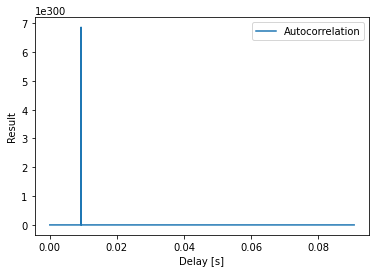

In [16]:
# plot
delay = np.linspace(0., sum.size/samplerate, sum.size)
plt.plot(delay, sum, label="Autocorrelation")
plt.legend()
plt.xlabel("Delay [s]")
plt.ylabel("Result")
plt.show()

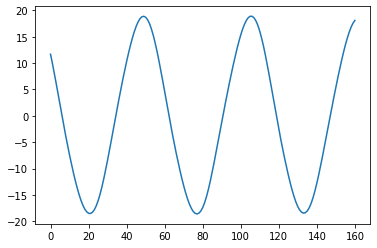

In [8]:
# this is what we want!
r = np.correlate(scdata[0:40], scdata)
plt.plot(r)